In [59]:
import pickle 
import glob
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

%matplotlib inline
plt.rcParams['font.family'] = "Noto Serif CJK JP"

columns = ['E', 'A', 'C', 'N', 'O']

# ファイル読み込み
with open('../../data/Hazumi_features/Hazumi1911_features.pkl', mode='rb') as f:
    SS1911, TS1911, SP1911, TP1911, Text1911, Audio1911, Visual1911, vid1911 = pickle.load(f, encoding='utf-8')

with open('../../data/Hazumi_features/Hazumi2010_features.pkl', mode='rb') as f:
    _, TS2010, SP2010, _, _, _, _, vid_2010 = pickle.load(f, encoding='utf-8')

with open('../../data/Hazumi_features/Hazumi2012_features.pkl', mode='rb') as f:
    _, TS_2012, SP_2012, _, _, _, _, vid_2012 = pickle.load(f, encoding='utf-8')

def show_boxplotv2(df):
    columns = ['E', 'A', 'C', 'N', 'O']
    df0 = df[df['cluster']==0].iloc[:,:-1]
    df1 = df[df['cluster']==1].iloc[:,:-1]
    df2 = df[df['cluster']==2].iloc[:,:-1]
    df3 = df[df['cluster']==3].iloc[:,:-1]
    df4 = df[df['cluster']==4].iloc[:,:-1]
    df5 = df[df['cluster']==5].iloc[:,:-1]
    df6 = df[df['cluster']==6].iloc[:,:-1]
    df7 = df[df['cluster']==7].iloc[:,:-1]
    df8 = df[df['cluster']==8].iloc[:,:-1]

    Figure = plt.figure() 
    ax0 = Figure.add_subplot(5, 5, 1)
    ax1 = Figure.add_subplot(4, 3, 2)
    ax2 = Figure.add_subplot(4, 3, 3)
    ax3 = Figure.add_subplot(4, 3, 4)
    ax4 = Figure.add_subplot(4, 3, 5)
    ax5 = Figure.add_subplot(4, 3, 6)
    ax6 = Figure.add_subplot(4, 3, 7)
    ax7 = Figure.add_subplot(4, 3, 8)
    ax8 = Figure.add_subplot(4, 3, 9)

    ax0.set_xticklabels(columns)
    ax1.set_xticklabels(columns)
    ax2.set_xticklabels(columns)
    ax3.set_xticklabels(columns)
    ax4.set_xticklabels(columns)
    ax5.set_xticklabels(columns)
    ax6.set_xticklabels(columns)
    ax7.set_xticklabels(columns)
    ax8.set_xticklabels(columns)

    ax0.set_ylim(2, 14)
    ax1.set_ylim(2, 14)
    ax2.set_ylim(2, 14)
    ax3.set_ylim(2, 14)
    ax4.set_ylim(2, 14)
    ax5.set_ylim(2, 14)
    ax6.set_ylim(2, 14)
    ax7.set_ylim(2, 14)
    ax8.set_ylim(2, 14)

    ax0.set_title(f'class0')
    ax1.set_title(f'class1')
    ax2.set_title(f'class2')
    ax3.set_title(f'class3')
    ax4.set_title(f'class4')
    ax5.set_title(f'class5')
    ax6.set_title(f'class6')
    ax7.set_title(f'class7')
    ax8.set_title(f'class8')

    ax0.boxplot(df0)
    ax1.boxplot(df1)
    ax2.boxplot(df2)
    ax3.boxplot(df3)
    ax4.boxplot(df4)
    ax5.boxplot(df5)
    ax6.boxplot(df6)
    ax7.boxplot(df7)
    ax8.boxplot(df8)


In [67]:
n_clusters = 9
df_1911 = pd.DataFrame.from_dict(TP1911, orient='index', columns=columns)
# sc = StandardScaler()
# df_1911 = sc.fit_transform(df_1911)
# df_1911 = pd.DataFrame(df_1911, columns=columns)

model = KMeans(n_clusters=n_clusters, random_state=0) 
model.fit(df_1911)
pred = model.predict(df_1911)


df_1911['cluster'] = pred
# show_boxplotv2(df_1911)
results = [[] for _ in range(9)]
for index, row in df_1911.iterrows():
    results[int(row["cluster"])].append(row["E": "O"].values.tolsit())
print(results)
# cluster = {} 
# for i, id in enumerate(vid1911):
#     cluster[id] = df_1911.loc[i, "cluster"]
# with open('../../data/Hazumi_features/Hazumi1911_features_cluster.pkl', mode='wb') as f:
#     pickle.dump((SS1911, TS1911, SP1911, TP1911, Text1911, Audio1911, Visual1911, cluster, vid1911), f)

/home/ryoyanagimoto/anaconda3/envs/personality/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'numpy.ndarray' object has no attribute 'tolsit'

/home/ryoyanagimoto/anaconda3/envs/personality/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


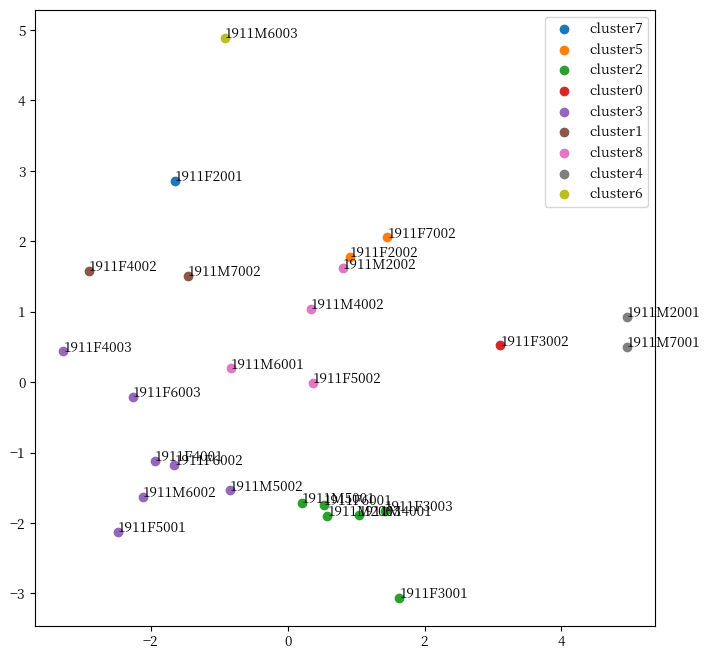

In [56]:
# PCAでクラスタリングの可視化
from sklearn.decomposition import PCA
n_clusters = 9
df = pd.DataFrame.from_dict(TP1911, orient='index', columns=columns)
clustering = df.copy() 

model = KMeans(n_clusters=n_clusters, random_state=0) 
clusters = model.fit(df)
df['cluster'] = clusters.labels_
annotations = df.index.values.tolist()

x = clustering
pca = PCA(n_components=2)
pca.fit(x)
x_pca = pca.transform(x) 
pca_df = pd.DataFrame(x_pca) 
pca_df['cluster'] = df['cluster'].values 

fig = plt.figure(figsize = (8, 8))

for i in pca_df['cluster'].unique():
    tmp = pca_df.loc[pca_df['cluster'] == i]
    plt.scatter(tmp[0], tmp[1], label=f'cluster{i}')

# 各要素にDataFrameのインデックスの数字をラベルとして付ける
for i, label in enumerate(annotations):
    plt.annotate(label, (pca_df.loc[i][0], pca_df.loc[i][1]))
    
plt.legend()


/home/ryoyanagimoto/anaconda3/envs/personality/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2 0.31018721231075175


/home/ryoyanagimoto/anaconda3/envs/personality/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3 0.2948165920917739


/home/ryoyanagimoto/anaconda3/envs/personality/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4 0.29657011834042274


/home/ryoyanagimoto/anaconda3/envs/personality/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ryoyanagimoto/anaconda3/envs/personality/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5 0.31536273883665306
6 0.31805814813803546


/home/ryoyanagimoto/anaconda3/envs/personality/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7 0.3254986023045895


/home/ryoyanagimoto/anaconda3/envs/personality/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


8 0.3385664401273626


/home/ryoyanagimoto/anaconda3/envs/personality/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


9 0.34365279462610016


/home/ryoyanagimoto/anaconda3/envs/personality/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


10 0.28678477709771283


/home/ryoyanagimoto/anaconda3/envs/personality/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


11 0.29763444202145634


/home/ryoyanagimoto/anaconda3/envs/personality/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


12 0.241229604301689


/home/ryoyanagimoto/anaconda3/envs/personality/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


13 0.226500615871372


/home/ryoyanagimoto/anaconda3/envs/personality/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


14 0.21144115000494004


/home/ryoyanagimoto/anaconda3/envs/personality/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


15 0.19235455782974437


/home/ryoyanagimoto/anaconda3/envs/personality/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


16 0.16068691693327122


/home/ryoyanagimoto/anaconda3/envs/personality/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


17 0.1707472829341892


/home/ryoyanagimoto/anaconda3/envs/personality/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


18 0.16666532710921295


/home/ryoyanagimoto/anaconda3/envs/personality/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


19 0.11353701645707454


/home/ryoyanagimoto/anaconda3/envs/personality/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


20 0.1380737792057364


/home/ryoyanagimoto/anaconda3/envs/personality/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


21 0.12119836675434607


/home/ryoyanagimoto/anaconda3/envs/personality/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


22 0.1028460837974845


/home/ryoyanagimoto/anaconda3/envs/personality/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


23 0.0598210793105186


/home/ryoyanagimoto/anaconda3/envs/personality/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


24 0.039476554588353155


/home/ryoyanagimoto/anaconda3/envs/personality/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


25 0.019919667015029858


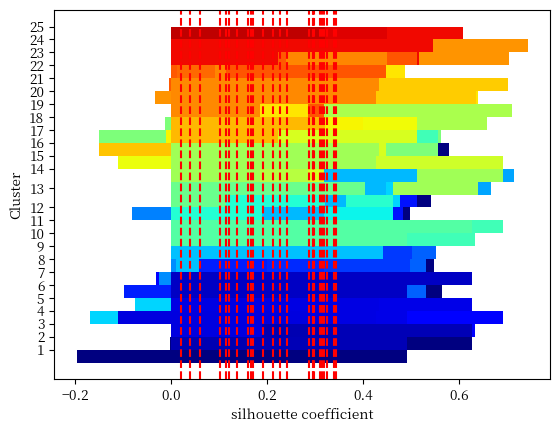

In [33]:
for n_cluster in range(2, 26):
    df_1911 = pd.DataFrame.from_dict(TP1911, orient='index', columns=columns)
    # sc = StandardScaler()
    # df_1911 = sc.fit_transform(df_1911)
    # df_1911 = pd.DataFrame(df_1911, columns=columns)
    model = KMeans(n_clusters=n_cluster, random_state=0) 
    model.fit(df_1911)
    cluster = model.labels_

    cluster_labels = np.unique(model.labels_)       # y_kmの要素の中で重複を無くす
    n_clusters=cluster_labels.shape[0]     # 配列の長さを返す。つまりここでは n_clustersで指定した3となる

    # シルエット係数を計算
    silhouette_vals = silhouette_samples(df_1911,model.labels_,metric='euclidean')  # サンプルデータ, クラスター番号、ユークリッド距離でシルエット係数計算
    y_ax_lower, y_ax_upper= 0,0
    yticks = []

    for i,c in enumerate(cluster_labels):
            c_silhouette_vals = silhouette_vals[model.labels_==c]      # cluster_labelsには 0,1,2が入っている（enumerateなのでiにも0,1,2が入ってる（たまたま））
            c_silhouette_vals.sort()
            y_ax_upper += len(c_silhouette_vals)              # サンプルの個数をクラスターごとに足し上げてy軸の最大値を決定
            color = cm.jet(float(i)/n_clusters)               # 色の値を作る
            plt.barh(range(y_ax_lower,y_ax_upper),            # 水平の棒グラフのを描画（底辺の範囲を指定）
                            c_silhouette_vals,               # 棒の幅（1サンプルを表す）
                            height=1.0,                      # 棒の高さ
                            edgecolor='none',                # 棒の端の色
                            color=color)                     # 棒の色
            yticks.append((y_ax_lower+y_ax_upper)/2)          # クラスタラベルの表示位置を追加
            y_ax_lower += len(c_silhouette_vals)              # 底辺の値に棒の幅を追加

    silhouette_avg = np.mean(silhouette_vals)                 # シルエット係数の平均値
    plt.axvline(silhouette_avg,color="red",linestyle="--")    # 係数の平均値に破線を引く 
    plt.yticks(yticks,cluster_labels + 1)                     # クラスタレベルを表示
    plt.ylabel('Cluster')
    plt.xlabel('silhouette coefficient')
    # plt.show()

    silhouette_avg = silhouette_score(df_1911, model.labels_)
    print(n_cluster, silhouette_avg)
    
    df_1911['cluster'] = cluster
    # show_boxplot(df_1911)
    cluster = {} 
    for id in vid1911:
        cluster[id] = df_1911.loc[id, "cluster"]
    with open('../../data/Hazumi_features/Hazumi1911_features_cluster.pkl', mode='wb') as f:
        pickle.dump((SS1911, TS1911, SP1911, TP1911, Text1911, Audio1911, Visual1911, cluster, vid1911), f)

## HazumiAll(1911, 2010, 2012)

In [ ]:
SP = {}
SP.update(SP1911)
SP.update(SP2010)
SP.update(SP_2012)

vid = []
vid.extend(vid1911)
vid.extend(vid_2010)
vid.extend(vid_2012)

df = pd.DataFrame.from_dict(SP, orient='index', columns=columns)
sc = StandardScaler()
df = sc.fit_transform(df)
df = pd.DataFrame(df, columns=columns, index=vid)

model = KMeans(n_clusters=16, random_state=0) 
model.fit(df)
cluster = model.labels_

df['cluster'] = cluster
show_boxplot(df)

cluster = {} 
for i, id in enumerate(vid1911):
    cluster[id] = df.loc[id, "cluster"]
with open('../../data/Hazumi_features/Hazumi1911_features_cluster.pkl', mode='wb') as f:
    pickle.dump((SS1911, TS1911, SP1911, TP1911, Text1911, Audio1911, Visual1911, cluster, vid1911), f)

## クラスタごとの分析

### HazumiAll

In [ ]:
import math 
TS = {} 
TS.update(TS_1911)
TS.update(TS_2010)
TS.update(TS_2012)

sentiments = [[], [], [], []]
ages = [[], [], [], []]

for id in vid:
    cluster = df.loc[id, "cluster"]
    sentiment = math.floor(sum(TS[id]) / len(TS[id])*100)/100
    sentiments[cluster].append(sentiment)
    ages[cluster].append(int(id[5:7]))

sentiments = [round(sum(sentiments[0]) / len(sentiments[0]), 1) for sentiment in sentiments]
ages = [round(sum(age) / len(age)) for age in ages]
print("sentiments:", sentiments)
print("age:", ages)

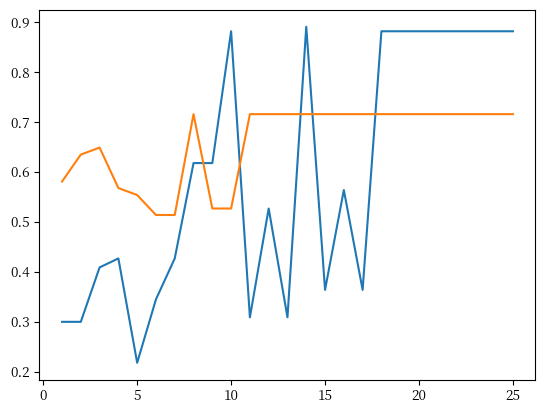

In [34]:
x = [i for i in range(1, 26)]
y = [0.3, 0.3, 0.409, 0.427, 0.218, 0.345, 0.427, 0.618, 0.618, 0.882, 0.309, 0.527, 0.309, 0.891, 0.364, 0.564, 0.364, 0.882, 0.882, 0.882, 0.882, 0.882, 0.882, 0.882, 0.882]
y1 = [0.581, 0.635, 0.649, 0.568, 0.554, 0.514, 0.514, 0.716, 0.527, 0.527, 0.716, 0.716, 0.716, 0.716, 0.716, 0.716, 0.716, 0.716, 0.716, 0.716, 0.716, 0.716, 0.716, 0.716, 0.716]
plt.plot(x, y)
plt.plot(x, y1)
